## Question to Answer
> Which target city has the best profit potential when considering typical rental and mortgage costs? <br>
>> What is the differential between rent & mortage? <br>
>> Where has growth been the best? <br>
Bonus: Will property taxes make greater impact on profit in one city vs. another?
## Approach
1. Identify factors / Select data: Monthly Rental (dollars), Monthly Mortage (dollars); Bonus: Property Tax Rates & Property Values
2. Identify data source: Census Python Module **API**: https://www.census.gov/data/developers/guidance/api-user-guide.html
3. Collect data: monthly rates ~~2020-2022~~ 2019-2021
4. Analyze data: 
> a. calculate annual % changes <br> 
> b. create bar charts <br> 
## Analysis Summary
A single city does not stand out as top across all the views created. However, San Francisco consistently is the top consideration while other cities fluctiate in rankings. Chicago comes up positively in two of the three views. Denver also shows up positively inn two of teh three views, but not as strongly as Chicago.
 - Austin and Chicago show the most growth in home value while Memphis and San Francisco are in the next grouping
 - Chicago and San Francisco have the highest % change in rental values with Austin and Denver in the next group
 - New York and San francisco have the highest differential between gross rental cost growth and mortgage costs growth with Denver coming in third (i.e. rental costs outpacing mortage costs)

Bonus: Comparing the top 15 urban areas in the Census data for rental cost ourpacing mortgage cost and top 15 urban areas for home value growth, Four Corners, FL is the only urban area in both lists (14th in rent outpacing mortage, 10th in home value growth)

In [1]:
# Dependencies & setup

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path 
from scipy import stats
from census import Census

# Requires API key labeled as "census_key" within a config.py file parallel to this notebook: https://github.com/datamade/census
from config import census_key

# Create an instance of the Census library
# By default, the year for a dataset is the most recent year available.

# Target cities: Austin, Chicago, Denver, Memphis, New York, San Francisco (https://api.census.gov/data/2019/acs/acs1?get=NAME,B01001_001E&for=urban%20area:*)
city_list_str = "04384, 16264, 23527, 56116, 63217, 78904"

# This notebook focuses on rent and owner costs: Median Contract Rent(B25058_001E), Median Gross Rent (B25064_001E), Median Home Value (B25077_001E), Median Monthly Owner Costs (B25088_002E)
# Median Contract Rent = average rent
# Median gross rent = average cost of rent and utilities combined
# Median value (dollars) =average value of an owner-occupied home
# Median Monthly Owner Costs (Dollars) = average monthly housing expense for a homeowner with a mortgage
var_list = ("B25058_001E", "B25064_001E", "B25077_001E", "B25088_002E")

# Define function to gather data from the census API
def urban_req(yr, var_list, loc_str):
    c = Census(census_key, year = yr)
    data = c.acs.get(var_list, {"for": "urban area:"+loc_str})
    return(data)

# Define function for converting data into dataframe
def urban_df(yr, data):
    # Convert to DataFrame
    df = pd.DataFrame(data)

    # Column renaming
    df = df.rename(columns = {"B25058_001E":str(yr)+" Median Contract Rent", "B25064_001E":str(yr)+" Median Gross Rent","urban area": "City ID",
                              "B25077_001E":str(yr)+" Median Home Value", "B25088_002E":str(yr)+" Median Monthly Owner Costs","urban area": "City ID"})

    # Converting to numbers
    df[str(yr)+" Median Contract Rent"] = df[str(yr)+" Median Contract Rent"].astype(float)
    df[str(yr)+" Median Gross Rent"] = df[str(yr)+" Median Gross Rent"].astype(float)
    df[str(yr)+" Median Home Value"] = df[str(yr)+" Median Home Value"].astype(float)
    df[str(yr)+" Median Monthly Owner Costs"] = df[str(yr)+" Median Monthly Owner Costs"].astype(float)
    return df

In [2]:
# Create an instance of the Census library to get 2019 data
census_data_19 = urban_req(2019, var_list, city_list_str)

In [3]:
# 2019 Convert to DataFrame
census_pd_19 = urban_df(2019, census_data_19)
census_pd_19.head()

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,City ID
0,1792.0,1887.0,883600.0,3129.0,78904
1,1322.0,1439.0,454000.0,2813.0,63217
2,724.0,943.0,146700.0,1314.0,56116
3,983.0,1131.0,245300.0,1914.0,16264
4,1273.0,1380.0,371200.0,1836.0,23527


In [4]:
# Create an instance of the Census library to get 2020 data
census_data_20 = urban_req(2020, var_list, city_list_str)

In [5]:
# 2020 Convert to DataFrame
census_pd_20 = urban_df(2020, census_data_20)
census_pd_20.head()

,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs,City ID
0,1024.0,1165.0,253300.0,1934.0,16264
1,1363.0,1483.0,468900.0,2836.0,63217
2,1897.0,1999.0,935500.0,3250.0,78904
3,1198.0,1356.0,314100.0,1999.0,04384
4,1342.0,1446.0,399500.0,1916.0,23527


In [6]:
# Create an instance of the Census library to get 2021 data
census_data_21 = urban_req(2021, var_list, city_list_str)

In [7]:
# 2021 Convert to DataFrame
census_pd_21 = urban_df(2021, census_data_21)
census_pd_21.head()

,2021 Median Contract Rent,2021 Median Gross Rent,2021 Median Home Value,2021 Median Monthly Owner Costs,City ID
0,1269.0,1424.0,337900.0,2121.0,04384
1,1085.0,1220.0,264200.0,2008.0,16264
2,1432.0,1553.0,431200.0,2049.0,23527
3,781.0,1014.0,165900.0,1389.0,56116
4,1438.0,1573.0,486900.0,2942.0,63217


In [8]:
# Merge 2019 and 2020 data
rent_2019_2020 = pd.merge(census_pd_19, census_pd_20, on="City ID", how="outer")
rent_2019_2020.head()

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,City ID,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs
0,1792.0,1887.0,883600.0,3129.0,78904,1897.0,1999.0,935500.0,3250.0
1,1322.0,1439.0,454000.0,2813.0,63217,1363.0,1483.0,468900.0,2836.0
2,724.0,943.0,146700.0,1314.0,56116,741.0,957.0,155100.0,1339.0
3,983.0,1131.0,245300.0,1914.0,16264,1024.0,1165.0,253300.0,1934.0
4,1273.0,1380.0,371200.0,1836.0,23527,1342.0,1446.0,399500.0,1916.0


In [9]:
# Merge 2019_2020 and 2021 data
rent_19_20_21 = pd.merge(rent_2019_2020, census_pd_21, on="City ID", how="outer")

# Clean up data frame and set city name as index
rent_19_20_21["City"]=["San Francisco", "New York", "Memphis", "Denver", "Chicago", "Austin"]
rent_19_20_21 = rent_19_20_21.drop("City ID", axis = 1)
rent_19_20_21 = rent_19_20_21.sort_values("City", ascending=True)
rent_19_20_21 = rent_19_20_21.set_index("City")

# Save to csv to have data without re-making API calls if necessary
rent_file = Path("resources/rent_mortgage.csv")
rent_19_20_21.to_csv(rent_file)

rent_19_20_21

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs,2021 Median Contract Rent,2021 Median Gross Rent,2021 Median Home Value,2021 Median Monthly Owner Costs
City,,,,,,,,,,,,
Austin,1152.0,1302.0,290300.0,1929.0,1198.0,1356.0,314100.0,1999.0,1269.0,1424.0,337900.0,2121.0
Chicago,1273.0,1380.0,371200.0,1836.0,1342.0,1446.0,399500.0,1916.0,1432.0,1553.0,431200.0,2049.0
Denver,983.0,1131.0,245300.0,1914.0,1024.0,1165.0,253300.0,1934.0,1085.0,1220.0,264200.0,2008.0
Memphis,724.0,943.0,146700.0,1314.0,741.0,957.0,155100.0,1339.0,781.0,1014.0,165900.0,1389.0
New York,1322.0,1439.0,454000.0,2813.0,1363.0,1483.0,468900.0,2836.0,1438.0,1573.0,486900.0,2942.0
San Francisco,1792.0,1887.0,883600.0,3129.0,1897.0,1999.0,935500.0,3250.0,2007.0,2134.0,983100.0,3437.0


In [10]:
# Calculate annual changes and create new dataframe

conrent_19_20_chng = 100*(rent_19_20_21["2020 Median Contract Rent"]-rent_19_20_21["2019 Median Contract Rent"])/rent_19_20_21["2019 Median Contract Rent"]
conrent_20_21_chng = 100*(rent_19_20_21["2021 Median Contract Rent"]-rent_19_20_21["2020 Median Contract Rent"])/rent_19_20_21["2020 Median Contract Rent"]
conrent_19_21_chng = 100*(rent_19_20_21["2021 Median Contract Rent"]-rent_19_20_21["2019 Median Contract Rent"])/rent_19_20_21["2019 Median Contract Rent"]

grsrent_19_20_chng = 100*(rent_19_20_21["2020 Median Gross Rent"]-rent_19_20_21["2019 Median Gross Rent"])/rent_19_20_21["2019 Median Gross Rent"]
grsrent_20_21_chng = 100*(rent_19_20_21["2021 Median Gross Rent"]-rent_19_20_21["2020 Median Gross Rent"])/rent_19_20_21["2020 Median Gross Rent"]
grsrent_19_21_chng = 100*(rent_19_20_21["2021 Median Gross Rent"]-rent_19_20_21["2019 Median Gross Rent"])/rent_19_20_21["2019 Median Gross Rent"]

homeval_19_20_chng = 100*(rent_19_20_21["2020 Median Home Value"]-rent_19_20_21["2019 Median Home Value"])/rent_19_20_21["2019 Median Home Value"]
homeval_20_21_chng = 100*(rent_19_20_21["2021 Median Home Value"]-rent_19_20_21["2020 Median Home Value"])/rent_19_20_21["2020 Median Home Value"]
homeval_19_21_chng = 100*(rent_19_20_21["2021 Median Home Value"]-rent_19_20_21["2019 Median Home Value"])/rent_19_20_21["2019 Median Home Value"]

moncost_19_20_chng = 100*(rent_19_20_21["2020 Median Monthly Owner Costs"]-rent_19_20_21["2019 Median Monthly Owner Costs"])/rent_19_20_21["2019 Median Monthly Owner Costs"]
moncost_20_21_chng = 100*(rent_19_20_21["2021 Median Monthly Owner Costs"]-rent_19_20_21["2020 Median Monthly Owner Costs"])/rent_19_20_21["2020 Median Monthly Owner Costs"]
moncost_19_21_chng = 100*(rent_19_20_21["2021 Median Monthly Owner Costs"]-rent_19_20_21["2019 Median Monthly Owner Costs"])/rent_19_20_21["2019 Median Monthly Owner Costs"]

change_df = pd.DataFrame({"2019-20 Contract Rent Change":conrent_19_20_chng, "2020-21 Contract Rent Change":conrent_20_21_chng, "2019-21 Contract Rent Change":conrent_19_21_chng, 
             "2019-20 Gross Rent Change":grsrent_19_20_chng, "2020-21 Gross Rent Change":grsrent_20_21_chng, "2019-21 Gross Rent Change":grsrent_19_21_chng, 
             "2019-20 Home Value Change":homeval_19_20_chng, "2020-21 Home Value Change":homeval_20_21_chng, "2019-21 Home Value Change":homeval_19_21_chng, 
             "2019-20 Mo Owner Cost Change":moncost_19_20_chng, "2020-21 Mo Owner Cost Change":moncost_20_21_chng, "2019-21 Mo Owner Cost Change":moncost_19_21_chng,})

# Save to csv to have data without re-making API calls if necessary
chng_file = Path("resources/rent_mortgage_perc_chng.csv")
rent_19_20_21.to_csv(chng_file)

change_df

,2019-20 Contract Rent Change,2020-21 Contract Rent Change,2019-21 Contract Rent Change,2019-20 Gross Rent Change,2020-21 Gross Rent Change,2019-21 Gross Rent Change,2019-20 Home Value Change,2020-21 Home Value Change,2019-21 Home Value Change,2019-20 Mo Owner Cost Change,2020-21 Mo Owner Cost Change,2019-21 Mo Owner Cost Change
City,,,,,,,,,,,,
Austin,3.993056,5.926544,10.156250,4.147465,5.014749,9.370200,8.198415,7.577205,16.396831,3.628823,6.103052,9.953344
Chicago,5.420267,6.706408,12.490181,4.782609,7.399723,12.536232,7.623922,7.934919,16.163793,4.357298,6.941545,11.601307
Denver,4.170905,5.957031,10.376399,3.006189,4.721030,7.869142,3.261313,4.303198,7.704851,1.044932,3.826267,4.911181
Memphis,2.348066,5.398111,7.872928,1.484624,5.956113,7.529162,5.725971,6.963250,13.087935,1.902588,3.734130,5.707763
New York,3.101362,5.502568,8.774584,3.057679,6.068780,9.312022,3.281938,3.838772,7.246696,0.817632,3.737659,4.585851
San Francisco,5.859375,5.798629,11.997768,5.935347,6.753377,13.089560,5.873699,5.088188,11.260751,3.867050,5.753846,9.843400


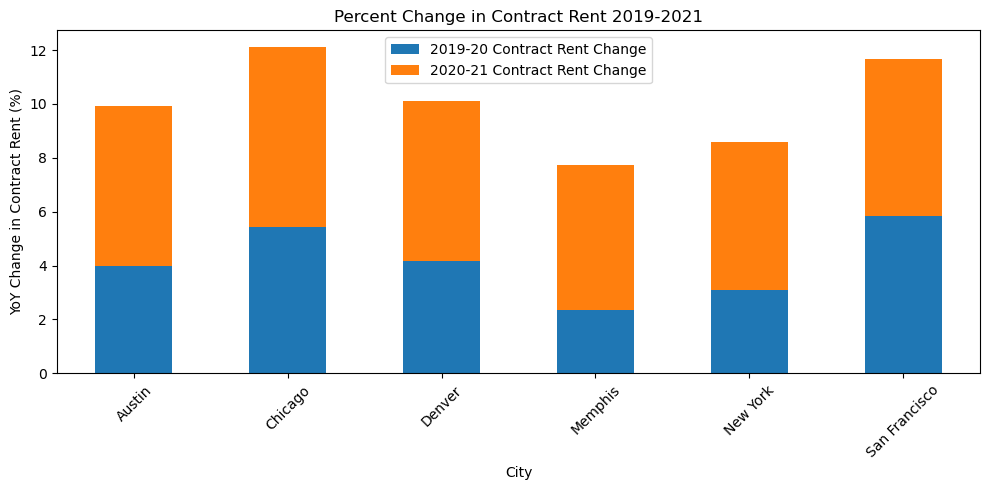

In [11]:
# Create a bar chart to compare contract rental changes across target cities (this uses pandas where the next one uses matplotlib)
conren_change = change_df[["2019-20 Contract Rent Change", "2020-21 Contract Rent Change"]]

# Pandas can plot multiple columns as stacked (stacked=True) or cluster (stacked=False)
multi_plot = conren_change.plot(kind="bar", figsize=(10,5), stacked=True, ylabel="YoY Change in Contract Rent (%)", title="Percent Change in Contract Rent 2019-2021")

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(conren_change.index, rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/ConRentChange.png")

plt.show()

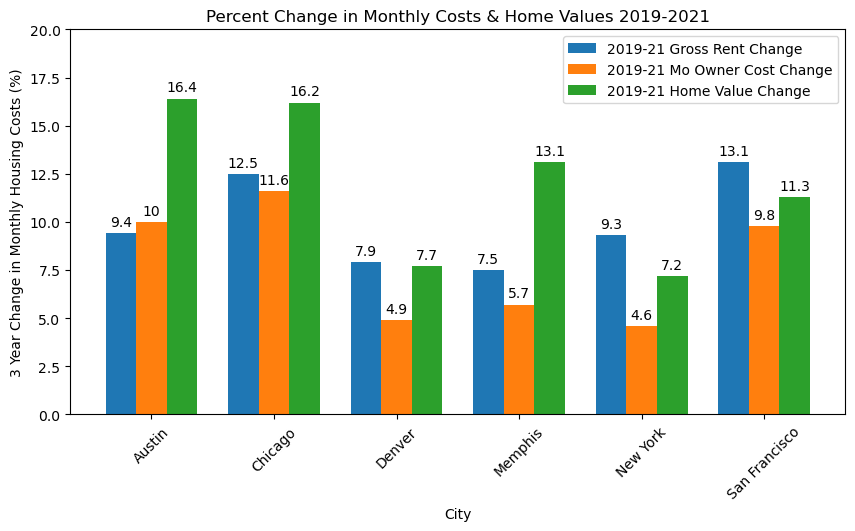

In [12]:
# Use Matplotlib to create a cluster bar chart with value labels to compare gross rental changes vs. monthly owner cost changes across target cities as well as home value changes

# Setup what to plot and details of bar shape
ticks = change_df.index
bars = {"2019-21 Gross Rent Change": change_df["2019-21 Gross Rent Change"], "2019-21 Mo Owner Cost Change": change_df["2019-21 Mo Owner Cost Change"], "2019-21 Home Value Change": change_df["2019-21 Home Value Change"]}
tick_locs = np.arange(len(change_df))
width = 0.25
multiplier = 0

# Create plot for each desired column
fig, ax = plt.subplots(figsize=(10,5))
for key, value in bars.items():
    offset = width*multiplier
    rects = ax.bar(tick_locs + offset, round(value,1), width, label=key)
    ax.bar_label(rects, padding=3)
    multiplier +=1

# Create labels, legends
ax.set_ylabel("3 Year Change in Monthly Housing Costs (%)")
ax.set_xlabel("City")
ax.set_title("Percent Change in Monthly Costs & Home Values 2019-2021")
ax.set_xticks(tick_locs+width, ticks, rotation=45)
ax.legend(loc="upper right")
ax.set_ylim(0, 20)

# Save the figure
plt.savefig("output_data/RentMortValChange.png")

plt.show()

## BONUS: Do the above API calls for all urban areas a pull out the best cities:

In [13]:
# Update city list to include all
city_list_str = "*"

In [14]:
# Create an instance of the Census library to get 2019 data
census_all_19 = urban_req(2019, var_list, city_list_str)

In [15]:
# 2019 Convert to DataFrame
census_all_19 = urban_df(2019, census_all_19)
census_all_19.head()

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,City ID
0,1495.0,1649.0,693600.0,2543.0,72640
1,467.0,625.0,99600.0,988.0,72667
2,504.0,711.0,125900.0,982.0,72694
3,629.0,682.0,150900.0,1211.0,72721
4,760.0,833.0,272400.0,1756.0,72748


In [16]:
# Create an instance of the Census library to get 2020 data
census_all_20 = urban_req(2020, var_list, city_list_str)

In [17]:
# 2020 Convert to DataFrame
census_all_20 = urban_df(2020, census_all_20)
census_all_20.head()

,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs,City ID
0,1010.0,1186.0,275800.0,1835.0,83859
1,612.0,822.0,137100.0,1065.0,54010
2,335.0,496.0,99300.0,1079.0,54037
3,1473.0,1831.0,224400.0,1665.0,54050
4,315.0,489.0,76600.0,1000.0,54064


In [18]:
# Create an instance of the Census library to get 2021 data
census_all_21 = urban_req(2021, var_list, city_list_str)

In [19]:
# 2021 Convert to DataFrame
census_all_21 = urban_df(2021, census_all_21)
census_all_21.head()

,2021 Median Contract Rent,2021 Median Gross Rent,2021 Median Home Value,2021 Median Monthly Owner Costs,City ID
0,489.0,705.0,102900.0,1083.0,00037
1,418.0,770.0,89000.0,978.0,00064
2,615.0,786.0,113600.0,1102.0,00091
3,380.0,594.0,75500.0,978.0,00118
4,608.0,700.0,163500.0,1267.0,00145


In [20]:
# Merge 2019 and 2020 data
all_2019_2020 = pd.merge(census_all_19, census_all_20, on="City ID", how="outer")
all_2019_2020.head()

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,City ID,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs
0,1495.0,1649.0,693600.0,2543.0,72640,1619.0,1728.0,719800.0,2648.0
1,467.0,625.0,99600.0,988.0,72667,473.0,648.0,99500.0,991.0
2,504.0,711.0,125900.0,982.0,72694,524.0,721.0,129700.0,987.0
3,629.0,682.0,150900.0,1211.0,72721,677.0,704.0,180700.0,1374.0
4,760.0,833.0,272400.0,1756.0,72748,787.0,856.0,287000.0,1854.0


In [21]:
# Merge 2019_2020 and 2021 data
all_19_20_21 = pd.merge(all_2019_2020, census_all_21, on="City ID", how="outer")
all_19_20_21.head()

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,City ID,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs,2021 Median Contract Rent,2021 Median Gross Rent,2021 Median Home Value,2021 Median Monthly Owner Costs
0,1495.0,1649.0,693600.0,2543.0,72640,1619.0,1728.0,719800.0,2648.0,1677.0,1820.0,767100.0,2632.0
1,467.0,625.0,99600.0,988.0,72667,473.0,648.0,99500.0,991.0,487.0,683.0,117100.0,957.0
2,504.0,711.0,125900.0,982.0,72694,524.0,721.0,129700.0,987.0,537.0,724.0,138500.0,1016.0
3,629.0,682.0,150900.0,1211.0,72721,677.0,704.0,180700.0,1374.0,668.0,724.0,213800.0,1535.0
4,760.0,833.0,272400.0,1756.0,72748,787.0,856.0,287000.0,1854.0,824.0,897.0,310200.0,1871.0


In [22]:
# Pull in the City ID to Urban name csv into a dataframe 
city_id = pd.read_csv("resources/Census_Urban_Areas.csv")
city_id_df = pd.DataFrame(city_id)

In [23]:
# Merge City IDs with Names to data pull and remove any unknowns
# City ID is an object in the all_19_20_21 so need to convert to int64 before merging
all_19_20_21["City ID"] = all_19_20_21["City ID"].astype(int)
allcity_19_20_21 = pd.merge(all_19_20_21, city_id_df, on="City ID", how="inner" )

# Remove City ID and set index to city name
allcity_19_20_21 = allcity_19_20_21.drop("City ID", axis=1)
allcity_19_20_21 = allcity_19_20_21.set_index("Urban Area")

# Save to csv to have data without re-making API calls if necessary in future sessions
all_rent_file = Path("resources/rent_mortgage_all.csv")
allcity_19_20_21.to_csv(all_rent_file)

allcity_19_20_21.head()

,2019 Median Contract Rent,2019 Median Gross Rent,2019 Median Home Value,2019 Median Monthly Owner Costs,2020 Median Contract Rent,2020 Median Gross Rent,2020 Median Home Value,2020 Median Monthly Owner Costs,2021 Median Contract Rent,2021 Median Gross Rent,2021 Median Home Value,2021 Median Monthly Owner Costs
Urban Area,,,,,,,,,,,,
"Trenton, NJ",1047.0,1201.0,249900.0,2104.0,1080.0,1240.0,254100.0,2110.0,1135.0,1303.0,260600.0,2180.0
"Tucson, AZ",753.0,896.0,182500.0,1303.0,773.0,921.0,197000.0,1331.0,814.0,967.0,214300.0,1393.0
"Stockton, CA",917.0,1115.0,272300.0,1677.0,967.0,1172.0,298300.0,1730.0,1061.0,1272.0,325500.0,1846.0
"Sumter, SC",589.0,816.0,125500.0,1076.0,604.0,831.0,127500.0,1099.0,653.0,893.0,136900.0,1174.0
"Turlock, CA",941.0,1115.0,292900.0,1666.0,966.0,1151.0,313300.0,1642.0,1051.0,1214.0,328500.0,1720.0


In [24]:
# Calculate 3 year changes and create new dataframe

conrent_19_21_chng = 100*(allcity_19_20_21["2021 Median Contract Rent"]-allcity_19_20_21["2019 Median Contract Rent"])/allcity_19_20_21["2019 Median Contract Rent"]
grsrent_19_21_chng = 100*(allcity_19_20_21["2021 Median Gross Rent"]-allcity_19_20_21["2019 Median Gross Rent"])/allcity_19_20_21["2019 Median Gross Rent"]
homeval_19_21_chng = 100*(allcity_19_20_21["2021 Median Home Value"]-allcity_19_20_21["2019 Median Home Value"])/allcity_19_20_21["2019 Median Home Value"]
moncost_19_21_chng = 100*(allcity_19_20_21["2021 Median Monthly Owner Costs"]-allcity_19_20_21["2019 Median Monthly Owner Costs"])/allcity_19_20_21["2019 Median Monthly Owner Costs"]
grsrentchng_moncostchng = grsrent_19_21_chng - moncost_19_21_chng

change_df_all = pd.DataFrame({"2019-21 Contract Rent Change":conrent_19_21_chng, "2019-21 Gross Rent Change":grsrent_19_21_chng, 
                          "2019-21 Home Value Change":homeval_19_21_chng, "2019-21 Mo Owner Cost Change":moncost_19_21_chng, 
                          "Gross Rent Change - Mo Ownwer Cost Change":grsrentchng_moncostchng})

# Save to csv to have data without re-making API calls if necessary
chng_file = Path("resources/rent_mortgage_perc_chng_all.csv")
change_df_all.to_csv(chng_file)

change_df_all

,2019-21 Contract Rent Change,2019-21 Gross Rent Change,2019-21 Home Value Change,2019-21 Mo Owner Cost Change,Gross Rent Change - Mo Ownwer Cost Change
Urban Area,,,,,
"Trenton, NJ",8.404967,8.492923,4.281713,3.612167,4.880755
"Tucson, AZ",8.100930,7.924107,17.424658,6.907137,1.016970
"Stockton, CA",15.703381,14.080717,19.537275,10.077519,4.003198
"Sumter, SC",10.865874,9.436275,9.083665,9.107807,0.328468
"Turlock, CA",11.689692,8.878924,12.154319,3.241297,5.637627
...,...,...,...,...,...
"Camarillo, CA",12.727273,12.737263,5.346216,8.323874,4.413388
"Wilmington, NC",10.532276,9.826590,12.880367,4.755614,5.070975
"Canton, OH",7.044674,6.048387,8.205521,2.395741,3.652646


In [25]:
# Find top cities for rental cost outpacing mortgage costs
change_df_all = change_df_all.sort_values("Gross Rent Change - Mo Ownwer Cost Change", ascending=False)
change_df_all.head(15)

,2019-21 Contract Rent Change,2019-21 Gross Rent Change,2019-21 Home Value Change,2019-21 Mo Owner Cost Change,Gross Rent Change - Mo Ownwer Cost Change
Urban Area,,,,,
"Fajardo, PR",9.651475,10.953347,1.011122,-4.736130,15.689477
"Westminster--Eldersburg, MD",14.850530,17.052271,4.457308,1.804368,15.247902
"El Paso de Robles (Paso Robles)--Atascadero, CA",14.100486,18.359669,11.764706,6.125227,12.234442
"St. George, UT",13.137033,16.240157,18.825246,5.238415,11.001742
"Jacksonville, NC",6.592040,7.324517,2.713435,-3.631961,10.956478
"Hilton Head Island, SC",12.236287,10.164425,3.465851,-0.739176,10.903601
"Bend, OR",20.723104,20.078740,20.162986,9.591373,10.487367
"Slidell, LA",12.722949,10.106900,5.176337,0.000000,10.106900
"Kenosha, WI",10.506329,10.526316,12.097264,0.540541,9.985775


In [26]:
# Find top cities for growth in home values costs
change_df_all = change_df_all.sort_values("2019-21 Home Value Change", ascending=False)
change_df_all.head(15)

,2019-21 Contract Rent Change,2019-21 Gross Rent Change,2019-21 Home Value Change,2019-21 Mo Owner Cost Change,Gross Rent Change - Mo Ownwer Cost Change
Urban Area,,,,,
"Nampa, ID",14.670256,14.317425,35.437761,12.237443,2.079982
"Boise City, ID",16.912599,16.548223,27.252082,8.692580,7.855644
"Sebring--Avon Park, FL",4.784689,1.951220,26.547744,8.893485,-6.942265
"Winter Haven, FL",11.570248,8.667389,25.835866,10.517666,-1.850277
"Coeur d'Alene, ID",11.254396,9.356137,25.446985,12.774295,-3.418158
"Idaho Falls, ID",8.383234,7.484663,25.377468,8.460237,-0.975574
"Ogden--Layton, UT",13.620489,13.475177,24.990083,8.857336,4.617841
"Longview, WA",10.416667,12.925969,24.866310,11.409396,1.516573
"Mount Vernon, WA",14.963119,10.843373,23.741007,15.959468,-5.116095


In [27]:
# Additional Notes for using census python library

# https://www.census.gov/data/developers/data-sets/acs-1year.html

# This notebook focuses on rent: Median Contract Rent(B25058_001E), Median Gross Rent (B25064_001E), Median Home Value (B25077_001E), Median Monthly Owner Costs (B25088_002E)
# Median Contract Rent = average rent
# Median gross rent = contract rent plus the cost of utilities
# Median value (dollars) = Owner-Occupied housing units
# Median onthly Owner Costs (Dollars) by  Mortgage Status

# urban areas:   https://api.census.gov/data/2021/acs/acsse?get=NAME,K200101_001E&for=urban%20area:*   39
# ["Austin, TX Urbanized Area (2010)","1653539","04384"]
# ["Chicago, IL--IN Urbanized Area (2010)","8636074","16264"],
# ["Denver--Aurora, CO Urbanized Area (2010)","2690882","23527"],
# ["Memphis, TN--MS--AR Urbanized Area (2010)","1073300","56116"],
# ["New York--Newark, NY--NJ--CT Urbanized Area (2010)","19182900","63217"],
# ["San Francisco--Oakland, CA Urbanized Area (2010)","3440874","78904"],
# TX is 48
# ["Travis County, Texas","1305154","48","453"]

# census_aliases: https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b
# "median_contract_rent":{  
#   "api":"acs",
#   "variable":"B25058_001E",
#   "description":"Median contract rent",
#   "text":"average rent",
#   "unit":"dollars"
# },
# "median_gross_rent":{  
#   "api":"acs",
#   "variable":"B25064_001E",
#   "description":"Median gross rent (contract rent plus the cost of utilities)",
#   "text":"average cost of rent and utilities combined",
#   "unit":"dollars"
# }
# "median_home_value":{  
#    "api":"acs",
#    "variable":"B25077_001E",
#    "description":"Median value (dollars) for Owner-Occupied housing units",
#    "text":"average value of an owner-occupied home",
#    "unit":"dollars"
#  },
#  "median_monthly_owner_costs":{  
#    "api":"acs",
#    "variable":"B25088_002E",
#    "description":"Median Selected Monthly Owner Costs (Dollars) by Mortgage Status",
#    "text":"average monthly housing expense for a homeowner with a mortgage",
#    "unit":"dollars"
#  },